# Logistic Regression - Breast Cancer Dataset

### Objective
The objective is to implement logistic regression **on a single feature** and perform classification.
Through this exercise, the goal is to gain practical experience in building a logistic regression
model, visualizing the results, understanding the impact of model parameters, and assessing the
classification performance, all within the context of a binary classification task.

## 1. About logistic regression

**Logistic regression** is a statistical method used for binary classification, predicting the probability that an instance belongs to a particular class. It is a type of regression analysis where the dependent variable is binary, representing two classes. Logistic Regression models the relationship between the independent variables (features) and the log-odds of the probability of the positive class. The logistic function (sigmoid) is employed to constrain the output to the range $[0, 1]$, transforming the linear combination of inputs into a probability distribution. Logistic regression predicts the probability of a binary outcome based on one or more predictor variables. The logistic regression model uses the logistic function (also known as the sigmoid function) to model the dependent variable. 

The logistic regression model predicts the probability $ \mathbb{P} $ of a binary outcome (usually coded as 0 and 1) based on one or more predictor variables $ X $. The logistic regression formula using the sigmoid (logistic) function is:

$$ \mathbb{P}(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}} $$

Where:
- $ \mathbb{P}(X) $ is the predicted probability of the event occurring given the predictor variables $ X = (X_1, X_2, \ldots, X_n) $.
- $ e $ is the base of the natural logarithm (Euler's number).
- $ \beta_0 $ is the intercept (bias).
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients (weights) associated with the predictor variables $ X_1, X_2, \ldots, X_n $.

The sigmoid function $ \frac{1}{1 + e^{-z}} $ ensures that the output $ \mathbb{P}(X) $ is always between 0 and 1, which is interpreted as the probability of the positive class (class 1) in binary classification problems.

## 2. Accuracy - the metric used
**Accuracy**, in the context of machine learning, is a metric used to evaluate the performance of a classification model. It measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances evaluated. A high accuracy score indicates that the model is making correct predictions most of the time.In mathematical terms, accuracy is calculated as:

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

## 3. Logistic regression - the best single column to predict target
The **worst perimeter** feature is highly significant for predicting breast cancer, achieving an accuracy of 0.9649 with logistic regression. The high accuracy indicates that 'worst perimeter' alone is a strong predictor and can effectively distinguish between malignant and benign tumors. Using 'worst perimeter' in diagnostic processes could enhance the reliability of breast cancer predictions, potentially aiding in early detection and treatment planning.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.style.use("fivethirtyeight")

In [59]:
df = load_breast_cancer()
breast_cancer = pd.DataFrame(df.data, columns=df.feature_names)
breast_cancer["target"] = df.target
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Logistic regression - the best single column to predict target

In [60]:
columns_to_use = breast_cancer.iloc[:, :-1].columns

best_feature = None
best_accuracy = 0.0
best_model = None
for feature in columns_to_use:
    X = breast_cancer[[feature]]
    y = breast_cancer['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for '{feature}': {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature = feature
        best_model = model

print(f"\nThe best single feature to predict breast cancer is '{best_feature}' with an accuracy score of {best_accuracy:.4f}.")

Accuracy for 'mean radius': 0.9123
Accuracy for 'mean texture': 0.6930
Accuracy for 'mean perimeter': 0.9298
Accuracy for 'mean area': 0.9211
Accuracy for 'mean smoothness': 0.6228
Accuracy for 'mean compactness': 0.6842
Accuracy for 'mean concavity': 0.7982
Accuracy for 'mean concave points': 0.6754
Accuracy for 'mean symmetry': 0.6228
Accuracy for 'mean fractal dimension': 0.6228
Accuracy for 'radius error': 0.8246
Accuracy for 'texture error': 0.6228
Accuracy for 'perimeter error': 0.8246
Accuracy for 'area error': 0.9211
Accuracy for 'smoothness error': 0.6228
Accuracy for 'compactness error': 0.6228
Accuracy for 'concavity error': 0.6228
Accuracy for 'concave points error': 0.6228
Accuracy for 'symmetry error': 0.6228
Accuracy for 'fractal dimension error': 0.6228
Accuracy for 'worst radius': 0.9386
Accuracy for 'worst texture': 0.6754
Accuracy for 'worst perimeter': 0.9649
Accuracy for 'worst area': 0.9386
Accuracy for 'worst smoothness': 0.6228
Accuracy for 'worst compactness': 

The **worst perimeter** feature is highly significant for predicting breast cancer, achieving an accuracy of 0.9649 with logistic regression. The high accuracy indicates that 'worst perimeter' alone is a strong predictor and can effectively distinguish between malignant and benign tumors. Using 'worst perimeter' in diagnostic processes could enhance the reliability of breast cancer predictions, potentially aiding in early detection and treatment planning.

# Visualize the most accurate variable (**worst perimeter**)

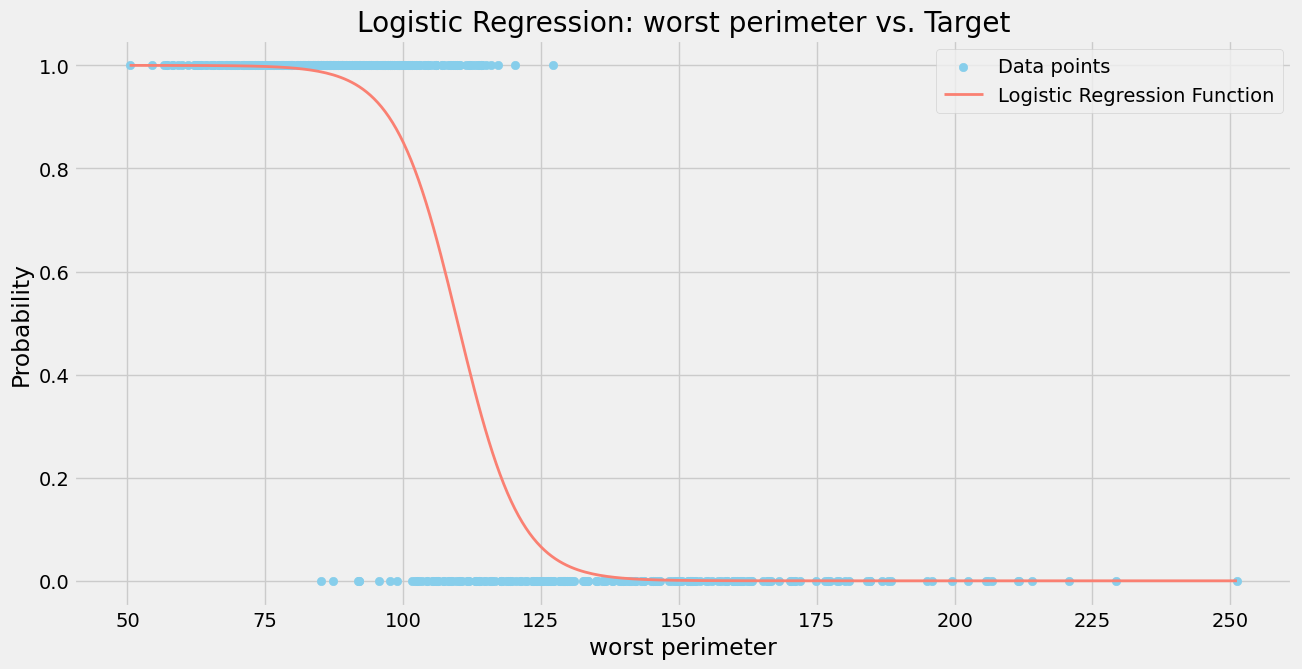

In [61]:
X_best = breast_cancer[[best_feature]]
y_best = breast_cancer['target']

best_model.fit(X_best, y_best)

# To plot the sigmoid function
x_values = np.linspace(X_best.min(), X_best.max(), 300).reshape(-1, 1)
x_values_df = pd.DataFrame(x_values, columns=[best_feature])
y_prob = best_model.predict_proba(x_values_df)[:, 1]

plt.figure(figsize=(14, 7))
plt.scatter(X_best, y_best, color='skyblue', marker='o', label='Data points')
plt.plot(x_values, y_prob, color='salmon', linewidth=2, label='Logistic Regression Function')
plt.xlabel(best_feature)
plt.ylabel('Probability')
plt.title(f'Logistic Regression: {best_feature} vs. Target')
plt.legend()
plt.grid(True)
plt.show()